In [12]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [13]:
pd.options.display.max_rows = 1000

df = pd.read_csv("mpls_crime_2017-2022.csv", encoding="utf-8")

In [14]:
df.sample(n=5)

,neighborhoodCrimeStatisticsID,neighborhood,ucrDescription,number,reportMonth,reportYear
38876,38877,Downtown West,Homicide,0.0,3,2022
33193,33194,Columbia Park,Arson,0.0,7,2021
8986,8987,Seward,Auto Theft,7.0,8,2018
11587,11588,King Field,Burglary,7.0,12,2018
16443,16444,Hawthorne,Burglary,9.0,7,2019


In [15]:
def clean_df(a_df):
    
    a_df = a_df.drop("neighborhoodCrimeStatisticsID", axis=1)
    a_df = a_df.loc[df["neighborhood"] != "Z_** NOT ASSIGNED **"]
    a_df = a_df.loc[df["neighborhood"] != "** NOT ASSIGNED **"]
    a_df["neighborhood"] = a_df["neighborhood"].replace("CARAG", "South Uptown")
    a_df["neighborhood"] = a_df["neighborhood"].replace("ECCO", "East Bde Maka Ska")
    a_df["neighborhood"] = a_df["neighborhood"].replace("WEST CALHOUN", "West Maka Ska")
    a_df["neighborhood"] = a_df.neighborhood.str.lower()
    a_df["neighborhood"] = a_df["neighborhood"].replace("stevens square - loring heights", "steven's square - loring heights")
    a_df["neighborhood"] = a_df["neighborhood"].replace("west calhoun", "west maka ska")
    a_df = a_df.sort_values(by="neighborhood")
    
    return a_df
    

In [16]:
# Breakpoint

crime_df = clean_df(df)

In [17]:
# 480 data points for each neighborhood, accounting for name changes!

crime_df.neighborhood.value_counts()

armatage                            480
morris park                         480
powderhorn park                     480
phillips west                       480
page                                480
northrop                            480
northeast park                      480
north loop                          480
nicollet island - east bank         480
near - north                        480
minnehaha                           480
regina                              480
midtown phillips                    480
mid - city industrial               480
mckinley                            480
marshall terrace                    480
marcy holmes                        480
lynnhurst                           480
lyndale                             480
lowry hill east                     480
prospect park - east river road     480
seward                              480
loring park                         480
ventura village                     480
windom                              480


In [ ]:
# Mpls Neighborhood "Communities"

CALHOUN_ISLES = ["bryn - mawr", "cedar - isles - dean", "east bde maka ska", "east isles", "kenwood", "lowry hill", \
                 "lowry hill east", "south uptown", "west maka ska"]

CAMDEN = ["camden industrial", "cleveland", "folwell", "humboldt industrial area", "lind - bohanon", "mckinley", "shingle creek", "victory", "webber - camden"]

CENTRAL = ["downtown east", "downtown west", "elliot park", "loring park", "north loop", "steven's square - loring heights"]

LONGFELLOW = ["cooper", "hiawatha", "howe", "longfellow", "seward"]

NEAR_NORTH = ["harrison", "hawthorne", "jordan", "near - north", "sumner - glenwood", "willard - hay"]

NOKOMIS = ["diamond lake", "ericsson", "field", "hale", "keewaydin", "minnehaha", "morris park", \
           "northrop", "page", "regina", "wenonah"]

NORTHEAST = ["audubon park", "beltrami", "bottineau", "columbia park", "holland", "logan park", "marshall terrace", \
             "northeast park", "sheridan", "st. anthony east", "st. anthony west", "waite park", "windom park"]

PHILLIPS = ["east phillips", "midtown phillips", "phillips west", "ventura village"]

POWDERHORN = ["bancroft", "bryant", "central", "corcoran", "lyndale", "powderhorn park", "standish", "whittier"]

SOUTHWEST = ["armatage", "east harriet", "fulton", "kenny", "king field", "linden hills", "lynnhurst", "tangletown", "windom"]

UNIVERSITY = ["cedar riverside", "como", "marcy holmes", "mid - city industrial", "nicollet island - east bank", "prospect park - east river road", "university of minnesota"]

In [7]:
# Make list of communities names, each a list of neighborhoods

COMMUNITIES = [CALHOUN_ISLES, CAMDEN, CENTRAL, LONGFELLOW, NEAR_NORTH, NOKOMIS, NORTHEAST, \
              PHILLIPS, POWDERHORN, SOUTHWEST, UNIVERSITY]

In [8]:
# As per FBI ucr reporting standards

violent_crimes = ["Aggravated Assault", "Homicide", "Rape", "Robbery"]

property_crimes = ["Arson", "Auto Theft", "Burglary", "Larceny"]

In [9]:
# Narrow down to just months and type of crime I'm interested in

before_violent = df[ (df["reportMonth"]==5) & (df["reportYear"]==2020) & (df["ucrDescription"].isin(violent_crimes)) ]
before_violent = before_violent.sort_values(by=["neighborhood", "ucrDescription"])
before_violent = before_violent.drop(["reportMonth", "reportYear"], axis=1)


after_violent = df[ (df["reportMonth"]==6) & (df["reportYear"]==2020) & (df["ucrDescription"].isin(violent_crimes)) ]
after_violent = after_violent.sort_values(by=["neighborhood", "ucrDescription"])
after_violent = after_violent.drop(["reportMonth", "reportYear"], axis=1)

before_property = df[ (df["reportMonth"]==5) & (df["reportYear"]==2020) & (df["ucrDescription"].isin(property_crimes)) ]
before_property = before_property.sort_values(by=["neighborhood", "ucrDescription"])
before_property = before_property.drop(["reportMonth", "reportYear"], axis=1)


after_property = df[ (df["reportMonth"]==6) & (df["reportYear"]==2020) & (df["ucrDescription"].isin(property_crimes)) ]
after_property = after_property.sort_values(by=["neighborhood", "ucrDescription"])
after_property = after_property.drop(["reportMonth", "reportYear"], axis=1)

In [ ]:
# Now have the 4 principal dfs I will use for all further work:
        
    '''
        
        1. before_violent
        2. after_violent
        3. before_property
        4. after_property
        
    '''

# I will split these into df by Mpls COMMUNITY, then run aggs and return series for plotting!

# CALHOUN_ISLES, CAMDEN, CENTRAL, LONGFELLOW, NEAR_NORTH, NOKOMIS, NORTHEAST, PHILLIPS, POWDERHORN, SOUTHWEST, UNIVERSITY

# Naming scheme:

    '''
    
        CALH = CALHOUN_ISLES
        CAMD = CAMDEN
        CENT = CENTRAL
        LONG = LONGFELLOW
        NEAR = NEAR_NORTH
        NOKO = NOKOMIS
        NORT = NORTHEAST
        PHIL = PHILLIPS
        POWD = POWDERHORN
        SOUT = SOUTHWEST
        UNIV = UNIVERSITY

    '''

<AxesSubplot:ylabel='neighborhood'>

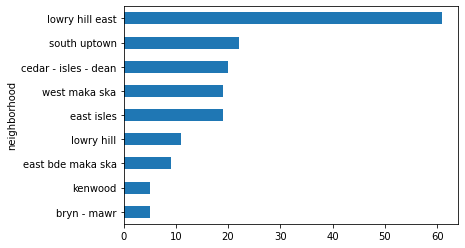

In [16]:
bp_CALHOUN_ISLES = before_property.loc[  (before_property["neighborhood"].isin(CALHOUN_ISLES))  ]
bp_CALHOUN_ISLES = bp_CALHOUN_ISLES.sort_values(by="neighborhood")

bp_CALHOUN_ISLES = before_property.loc[  (before_property["neighborhood"].isin(CALHOUN_ISLES))  ]
bp_CALHOUN_ISLES = bp_CALHOUN_ISLES.sort_values(by="neighborhood")

bp_CALHOUN_ISLES = before_property.loc[  (before_property["neighborhood"].isin(CALHOUN_ISLES))  ]
bp_CALHOUN_ISLES = bp_CALHOUN_ISLES.sort_values(by="neighborhood")

bp_CALHOUN_ISLES = before_property.loc[  (before_property["neighborhood"].isin(CALHOUN_ISLES))  ]
bp_CALHOUN_ISLES = bp_CALHOUN_ISLES.sort_values(by="neighborhood")

bp_CALHOUN_ISLES = before_property.loc[  (before_property["neighborhood"].isin(CALHOUN_ISLES))  ]
bp_CALHOUN_ISLES = bp_CALHOUN_ISLES.sort_values(by="neighborhood")

bp_CALHOUN_ISLES = before_property.loc[  (before_property["neighborhood"].isin(CALHOUN_ISLES))  ]
bp_CALHOUN_ISLES = bp_CALHOUN_ISLES.sort_values(by="neighborhood")

bp_CALHOUN_ISLES = before_property.loc[  (before_property["neighborhood"].isin(CALHOUN_ISLES))  ]
bp_CALHOUN_ISLES = bp_CALHOUN_ISLES.sort_values(by="neighborhood")

bp_CALHOUN_ISLES = before_property.loc[  (before_property["neighborhood"].isin(CALHOUN_ISLES))  ]
bp_CALHOUN_ISLES = bp_CALHOUN_ISLES.sort_values(by="neighborhood")

bp_CALHOUN_ISLES = before_property.loc[  (before_property["neighborhood"].isin(CALHOUN_ISLES))  ]
bp_CALHOUN_ISLES = bp_CALHOUN_ISLES.sort_values(by="neighborhood")

bp_CALHOUN_ISLES = before_property.loc[  (before_property["neighborhood"].isin(CALHOUN_ISLES))  ]
bp_CALHOUN_ISLES = bp_CALHOUN_ISLES.sort_values(by="neighborhood")






final_bp_CALHOUN_ISLES = bp_CALHOUN_ISLES.groupby("neighborhood")["number"].sum()
final_bp_CALHOUN_ISLES = final_bp_CALHOUN_ISLES.sort_values()

total_beforepropertycrime_CALHOUN_ISLES = final_bp_CALHOUN_ISLES.sum()

final_bp_CALHOUN_ISLES.plot(kind="barh")

In [24]:
bp_CALHOUN_ISLES

,neighborhood,ucrDescription,number
23281,bryn - mawr,Arson,0.0
23282,bryn - mawr,Auto Theft,1.0
23283,bryn - mawr,Burglary,3.0
23285,bryn - mawr,Larceny,1.0
23305,cedar - isles - dean,Arson,0.0
23306,cedar - isles - dean,Auto Theft,3.0
23307,cedar - isles - dean,Burglary,5.0
23309,cedar - isles - dean,Larceny,12.0
23397,east bde maka ska,Larceny,3.0
23395,east bde maka ska,Burglary,5.0


In [27]:
def get_community_totals(a_df):
    
    """ Returns Series """
    
    return (
                 a_df
                    .sort_values(by="neighborhood")
                    .groupby("neighborhood")
                    ["number"]
                    .sum()
                    
           )
    
  
    
    
    

<AxesSubplot:ylabel='neighborhood'>

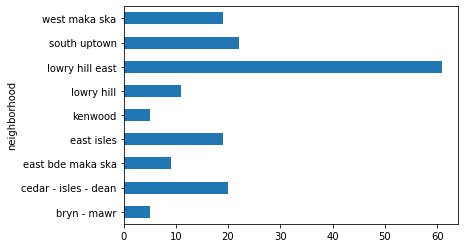

In [28]:
get_community_totals(bp_CALHOUN_ISLES).plot(kind="barh")

In [ ]:
ap_CALHOUN_ISLES = after_property.loc[  (after_property["neighborhood"].isin(CALHOUN_ISLES))  ]

ap_CALHOUN_ISLES

# bv_CALHOUN_ISLES
# av_CALHOUN_ISLES

In [ ]:
bp_CAMDEN
ap_CAMDEN
bv_CAMDEN
av_CAMDEN

In [ ]:
bp_CENTRAL
ap_CENTRAL
bv_CENTRAL
av_CENTRAL

In [ ]:
bp_LONGFELLOW
ap_LONGFELLOW
bv_LONGFELLOW
av_LONGFELLOW

In [ ]:
bp_NEAR_NORTH
ap_NEAR_NORTH
bv_NEAR_NORTH
av_NEAR_NORTH

In [ ]:
bp_NOKOMIS
ap_NOKOMIS
bv_NOKOMIS
av_NOKOMIS

In [ ]:
bp_NORTHEAST
ap_NORTHEAST
bv_NORTHEAST
av_NORTHEAST

In [ ]:
bp_PHILLIPS
ap_PHILLIPS
bv_PHILLIPS
av_PHILLIPS

In [ ]:
bp_POWDERHORN
ap_POWDERHORN
bv_POWDERHORN
av_POWDERHORN

In [ ]:
bp_SOUTHWEST
ap_SOUTHWEST
bv_SOUTHWEST
av_SOUTHWEST

In [ ]:
bp_UNIVERSITY
ap_UNIVERSITY
bv_UNIVERSITY
av_UNIVERSITY

In [ ]:
def run_agg(a_df):
    """ Return Series """
    return a_df.groupby(["neighborhood", "ucrDescription"])["number"].sum()      

In [ ]:
run_agg(before_property)

In [ ]:
before_grp = before.groupby(["neighborhood", "ucrDescription"])
after_grp = after.groupby(["neighborhood", "ucrDescription"])

In [ ]:
before_agg = before_grp["number"].sum()
after_agg = after_grp["number"].sum()

In [ ]:
before_agg[:24].unstack().plot.bar()

In [ ]:
after_agg[:24].unstack().plot.bar()

In [ ]:
before_property.sort_values(by=["neighborhood", "ucrDescription"])
after_property.sort_values(by=["neighborhood", "ucrDescription"])

before_violent.sort_values(by=["neighborhood", "ucrDescription"])
after_violent.sort_values(by=["neighborhood", "ucrDescription"])

In [ ]:
before_property_grp = before.groupby(["neighborhood", "ucrDescription"])
after_property_grp = after.groupby(["neighborhood", "ucrDescription"])

before_violent_grp = before.groupby(["neighborhood", "ucrDescription"])
after_violent_grp = after.groupby(["neighborhood", "ucrDescription"])

In [ ]:
before_property_agg = before_grp["number"].sum()
after_property_agg = after_grp["number"].sum()

before_violent_agg = before_grp["number"].sum()
after_violent_agg = after_grp["number"].sum()

In [ ]:
after_violent_agg.head(10)

In [ ]:
before_violent_agg.head(10)

In [ ]:
after_violent_agg[:24].unstack().plot.bar()

In [ ]:
before_violent_agg[:24].unstack().plot.bar()

In [ ]:
MPLS_CITIES = CALHOUN_ISLES + CAMDEN + CENTRAL + LONGFELLOW + NEAR_NORTH + NOKOMIS + NORTHEAST + \
              PHILLIPS + POWDERHORN + SOUTHWEST + UNIVERSITY
df_cities = df.neighborhood.unique()

In [ ]:
for c in sorted(MPLS_CITIES):
    if c in df_cities:
        pass
    else:
        print(c)

In [ ]:
sorted(MPLS_CITIES) == sorted(df_cities)

In [ ]:
len(MPLS_CITIES)

In [ ]:
len(df_cities)

In [ ]:
print(sorted(MPLS_CITIES))

In [ ]:
print(sorted(df_cities))

In [ ]:
oddballs = [x for x in (MPLS_CITIES + df_cities.tolist()) if x not in MPLS_CITIES or x not in df_cities]
print(oddballs)

In [ ]:
master_city_list = sorted(MPLS_CITIES)

In [ ]:
master_city_list == sorted(df_cities)

In [ ]:
master_city_dict = {}

In [ ]:
master_city_dict["CALHOUN_ISLES"] = CALHOUN_ISLES
master_city_dict["CAMDEN"] = CAMDEN
master_city_dict["CENTRAL"] = CENTRAL
master_city_dict["LONGFELLOW"] = LONGFELLOW
master_city_dict["NEAR_NORTH"] = NEAR_NORTH
master_city_dict["NOKOMIS"] = NOKOMIS
master_city_dict["NORTHEAST"] = NORTHEAST
master_city_dict["PHILLIPS"] = PHILLIPS
master_city_dict["POWDERHORN"] = POWDERHORN
master_city_dict["SOUTHWEST"] = SOUTHWEST
master_city_dict["UNIVERSITY"] = UNIVERSITY

In [ ]:
print(master_city_dict)

In [ ]:
before_property_agg

In [ ]:
after_property_agg

In [ ]:
before_violent_agg 

In [ ]:
after_violent_agg 